# Will They Click on the Advertisement?

### 1. Problem Definition
Based on the features of a particular internet user, will they click on an advertisement?

### 2. Data
This is a made-up advertisement dataset. Has 10 columns and 1000 rows

### 3. Evaluation
Binary classification - logistic regression. Scoring: accuracy, precision, recall, f1-score

### 4. Features
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

# EDA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [16]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [22]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [4]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

First, we check the general overview of our data

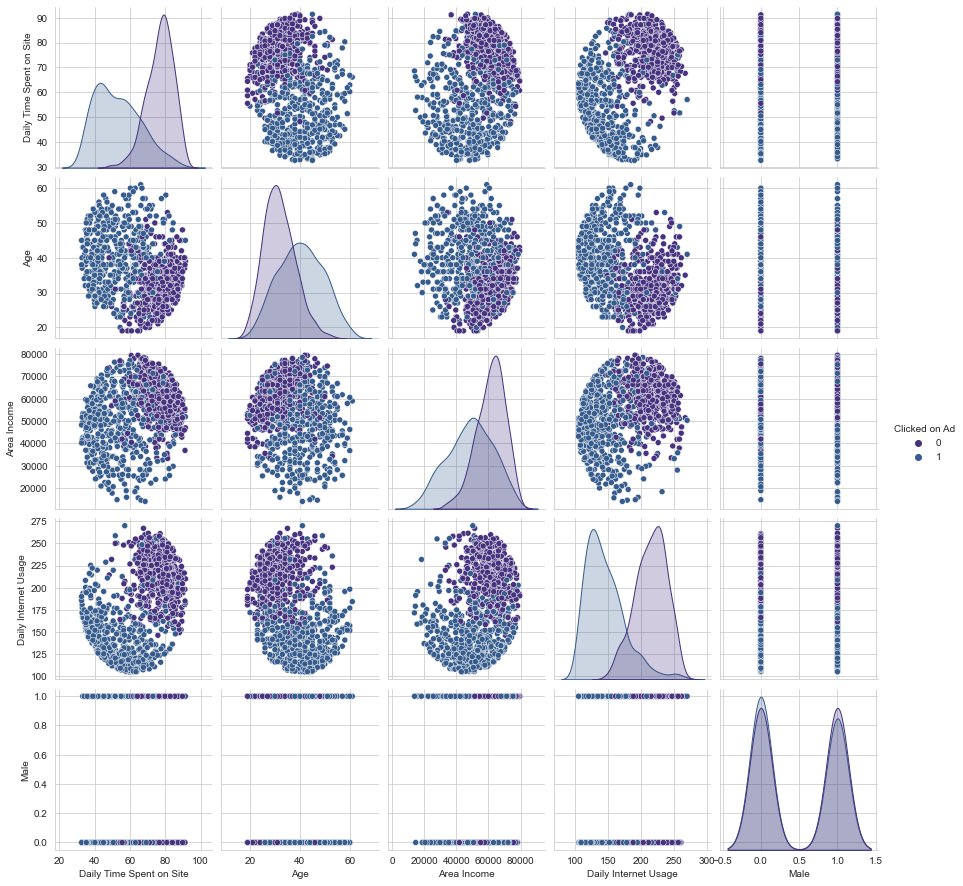

In [29]:
sns.pairplot(df, hue='Clicked on Ad')

Text(0.5, 1.0, 'Label Count')

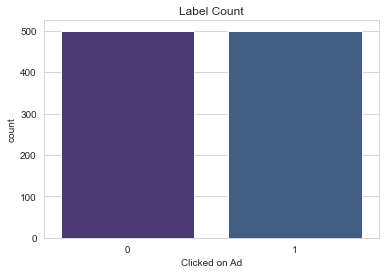

In [24]:
sns.countplot(x='Clicked on Ad', data=df)
plt.title('Label Count')

Label count has the same amount

Text(0.5, 1.0, 'Age Distributions')

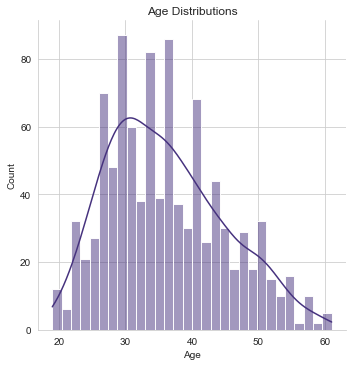

In [23]:
sns.displot(x='Age', data=df, bins=30, kde=True)
plt.title('Age Distributions')

Looks like age 30-40 dominated our data

Text(0.5, 1.0, 'Age vs Area Income')

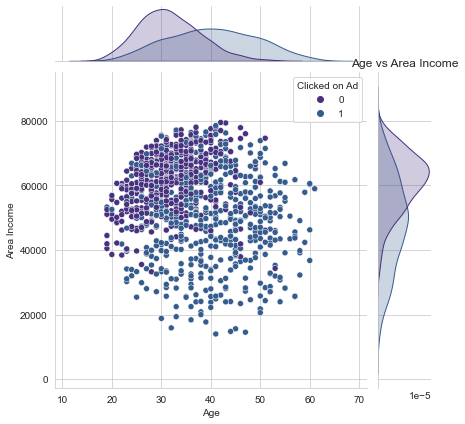

In [33]:
sns.jointplot(x='Age', y='Area Income', data=df, hue='Clicked on Ad')
plt.title('Age vs Area Income')

Text(0.5, 1.0, 'Age vs Daily Time Spent on Site')

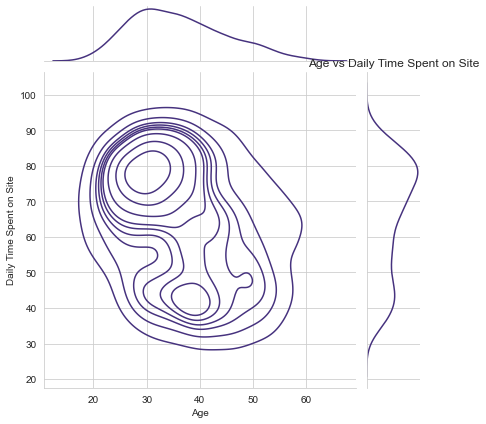

In [36]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, kind='kde')
plt.title('Age vs Daily Time Spent on Site')

Text(0.5, 1.0, 'Daily Time Spent on Site vs Daily Internet Usage')

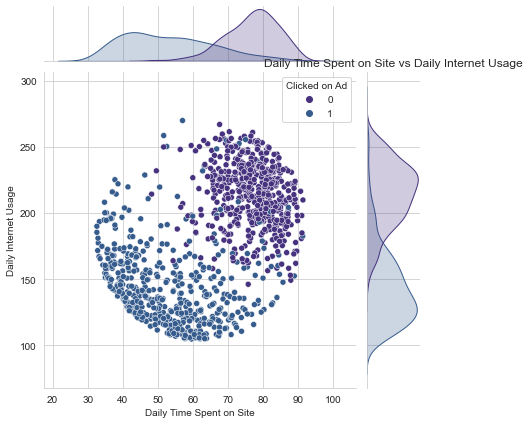

In [39]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df, hue='Clicked on Ad')
plt.title('Daily Time Spent on Site vs Daily Internet Usage')

# Datetime Object

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [44]:
df['Timestamp'].head()

0    2016-03-27 00:53:11
1    2016-04-04 01:39:02
2    2016-03-13 20:35:42
3    2016-01-10 02:31:19
4    2016-06-03 03:36:18
Name: Timestamp, dtype: object

In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'].head()

0   2016-03-27 00:53:11
1   2016-04-04 01:39:02
2   2016-03-13 20:35:42
3   2016-01-10 02:31:19
4   2016-06-03 03:36:18
Name: Timestamp, dtype: datetime64[ns]

In [21]:
df['year'] = df['Timestamp'].apply(lambda x: x.year)
df['month'] = df['Timestamp'].apply(lambda x: x.month)
df['day'] = df['Timestamp'].apply(lambda x: x.day)
df['dayofweek'] = df['Timestamp'].apply(lambda x: x.dayofweek)
df['hour'] = df['Timestamp'].apply(lambda x: x.hour)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,year,month,day,dayofweek,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,3,4,3


In [51]:
df['year'].value_counts()

2016    1000
Name: year, dtype: int64

Since there is only 1 unique year value, we're going to drop this

In [52]:
df['month'].value_counts()

2    160
3    156
5    147
4    147
1    147
6    142
7    101
Name: month, dtype: int64

Not all months are present, but it's not a problem

In [54]:
df['day'].nunique()

31

In [55]:
df['dayofweek'].value_counts()

6    159
2    156
4    155
3    142
0    140
5    126
1    122
Name: dayofweek, dtype: int64

0: Monday, 6: Sunday

In [56]:
df['hour'].nunique()

24

Text(0.5, 1.0, 'Month Count')

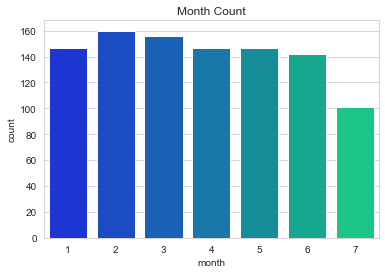

In [105]:
sns.countplot(x='month', data=df, palette='winter')
plt.title('Month Count')

Text(0.5, 0, 'dayofweek. 0=monday, 6=sunday')

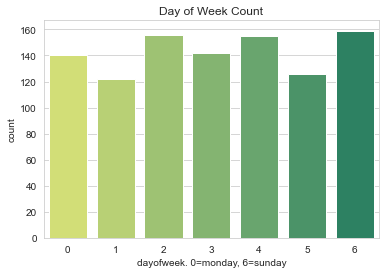

In [106]:
sns.countplot(x='dayofweek', data=df, palette='summer_r')
plt.title('Day of Week Count')
plt.xlabel('dayofweek. 0=monday, 6=sunday')

Text(0.5, 1.0, 'Day Distributions')

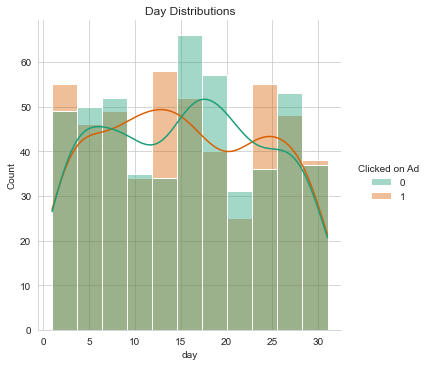

In [107]:
sns.displot(x='day', data=df, alpha=0.4, kde=True, hue='Clicked on Ad', palette='Dark2')
plt.title('Day Distributions')

Text(0.5, 1.0, 'Hour Distributions')

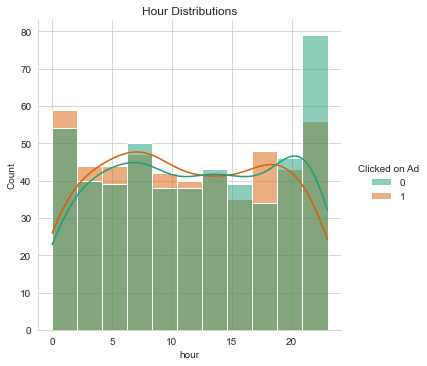

In [109]:
sns.displot(x='hour', data=df, kde=True, hue='Clicked on Ad', palette='Dark2')
plt.title('Hour Distributions')

Based on the `day` plot, ads are clicked mostly in the middle of the month and near end of the month. Also based on the `hour` plot, ads are clicked mostly at late morning and probably at when people going home from work/school.

Let's drop the `Timestamp` and `year` columns

In [22]:
df.drop('Timestamp', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

# Categorical Features

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
 9   month                     1000 non-null   int64  
 10  day                       1000 non-null   int64  
 11  dayofweek                 1000 non-null   int64  
 12  hour                      1000 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 101.7+ KB


**Ad Topic Line**

In [113]:
df['Ad Topic Line'].nunique()

1000

In [115]:
df['Ad Topic Line'].head(30)

0                Cloned 5thgeneration orchestration
1                Monitored national standardization
2                  Organic bottom-line service-desk
3             Triple-buffered reciprocal time-frame
4                     Robust logistical utilization
5                   Sharable client-driven software
6                        Enhanced dedicated support
7                          Reactive local challenge
8                    Configurable coherent function
9                Mandatory homogeneous architecture
10                   Centralized neutral neural-net
11    Team-oriented grid-enabled Local Area Network
12            Centralized content-based focus group
13                 Synergistic fresh-thinking array
14                    Grass-roots coherent extranet
15               Persistent demand-driven interface
16               Customizable multi-tasking website
17                       Intuitive dynamic attitude
18     Grass-roots solution-oriented conglomeration
19          

All of them are unique values. Maybe we can extract some features with Natural Language Processing, but it would take a long time. For now, we will not do that and will not be using this column.

**City**

In [116]:
df['City'].nunique()

969

This column too almost has unique features as many as the index. We won't be using this column either

**Country**

In [117]:
df['Country'].nunique()

237

We can actually group this column by continents like Asia, Africa, North America, etc. But to be honest, that would take time to list them. We will do it next time, but for now we won't be using this column.

Let's drop these columns

In [23]:
df.drop('Ad Topic Line', axis=1, inplace=True)
df.drop('City', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   month                     1000 non-null   int64  
 7   day                       1000 non-null   int64  
 8   dayofweek                 1000 non-null   int64  
 9   hour                      1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.2 KB


So what we did so far:
* Convert timestamp to datetime object and get the `month`, `day`, `dayofweek`, and `hour`.
* Drop `Timestamp`, `Ad Topic Line`, `City`, and `Country`.

# Build the Model

We can now move on to the next step, which is building the model

In [120]:
from sklearn.model_selection import train_test_split

X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test)

(700, 300)

We will use logistic regression for the classification

In [123]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

# Predictions and Evaluations

In [124]:
from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict(X_test)

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       146
           1       0.96      0.85      0.90       154

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300

[[140   6]
 [ 23 131]]


The model did a pretty good job. Now let's save the model.

In [125]:
import joblib

joblib.dump(model, 'log-reg-adv.joblib')

['log-reg-adv.joblib']

# Test on Brand New Data

We will now test the model on a new data it has never seen before

In [1]:
import pandas as pd
import joblib

In [2]:
test_data = {
    'Daily Time Spent on Site': 75.19,
    'Age': 41,
    'Area Income': 51473.48,
    'Daily Internet Usage': 174.26,
    'Ad Topic Line': 'Hi friend, click me please!!!',
    'City': 'Aakhen',
    'Male': 1,
    'Country': 'Cidonia',
    'Timestamp': '2016-05-21 10:32:19'
}

In [3]:
df_test = pd.DataFrame([test_data])
df_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,75.19,41,51473.48,174.26,"Hi friend, click me please!!!",Aakhen,1,Cidonia,2016-05-21 10:32:19


**Dealing with `Timestamp`**

In [4]:
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])

df_test['month'] = df_test['Timestamp'].apply(lambda x: x.month)
df_test['day'] = df_test['Timestamp'].apply(lambda x: x.day)
df_test['dayofweek'] = df_test['Timestamp'].apply(lambda x: x.dayofweek)
df_test['hour'] = df_test['Timestamp'].apply(lambda x: x.hour)

df_test.drop('Timestamp', axis=1, inplace=True)

**Dealing with other features**

In [5]:
df_test.drop('Ad Topic Line', axis=1, inplace=True)
df_test.drop('City', axis=1, inplace=True)
df_test.drop('Country', axis=1, inplace=True)

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1 non-null      float64
 1   Age                       1 non-null      int64  
 2   Area Income               1 non-null      float64
 3   Daily Internet Usage      1 non-null      float64
 4   Male                      1 non-null      int64  
 5   month                     1 non-null      int64  
 6   day                       1 non-null      int64  
 7   dayofweek                 1 non-null      int64  
 8   hour                      1 non-null      int64  
dtypes: float64(3), int64(6)
memory usage: 200.0 bytes


Now that our test data has the same structure as the data that was 'fed' into the model, we can predict this new data.

**Load the model**

In [8]:
model = joblib.load('log-reg-adv.joblib')

**Prediction**

In [9]:
pred = model.predict(df_test)

Re-assign the original data

In [11]:
df_predicted = pd.DataFrame([test_data])
df_predicted['predicted'] = pred

In [13]:
df_predicted

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,predicted
0,75.19,41,51473.48,174.26,"Hi friend, click me please!!!",Aakhen,1,Cidonia,2016-05-21 10:32:19,1


The model predicted when an internet user has the above features, they will click on the ad.

# Conclusion

What sort of features that will likely click on an ad?

**Age around between 35 - 45 years old**

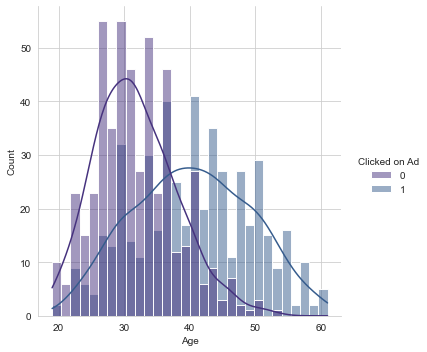

In [25]:
sns.displot(x='Age', data=df, bins=30, kde=True, hue='Clicked on Ad')

**Daily time spent on site less than 60**

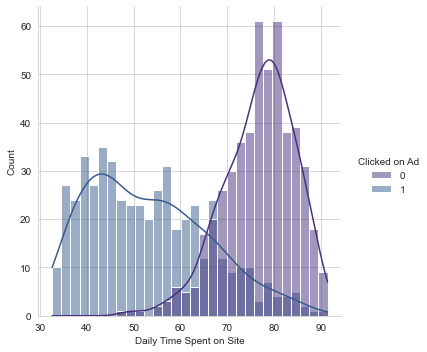

In [28]:
sns.displot(x='Daily Time Spent on Site', data=df, bins=30, kde=True, hue='Clicked on Ad')

**Area income between 45000 - 55000**

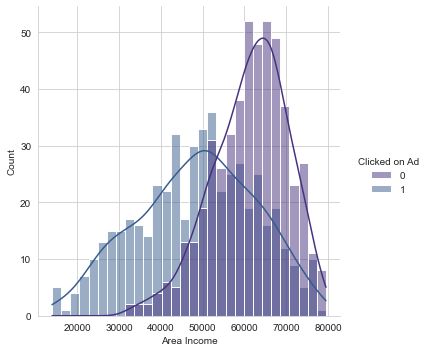

In [29]:
sns.displot(x='Area Income', data=df, bins=30, kde=True, hue='Clicked on Ad')

**Daily internet usage less than 175**

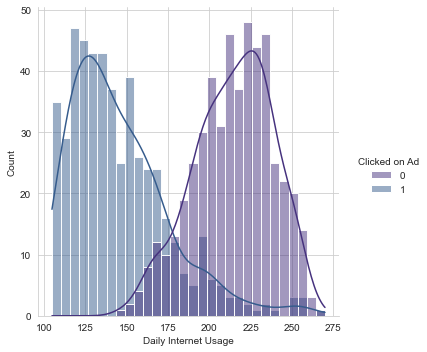

In [30]:
sns.displot(x='Daily Internet Usage', data=df, bins=30, kde=True, hue='Clicked on Ad')

**In the middle of the months or near end**

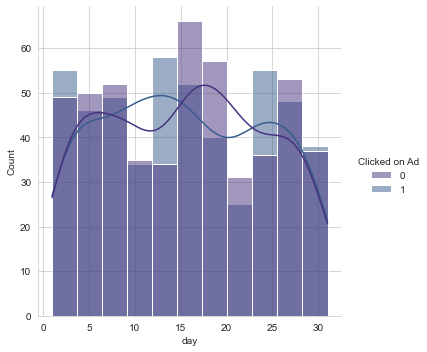

In [38]:
sns.displot(x='day', data=df, kde=True, hue='Clicked on Ad')

**At around late morning and when people going home from work/school**

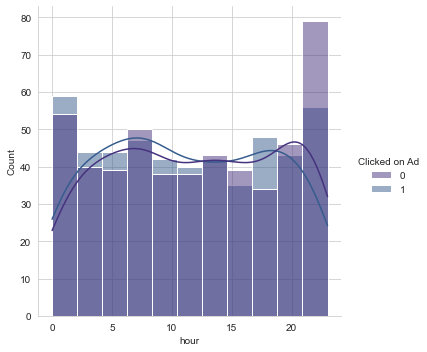

In [41]:
sns.displot(x='hour', data=df, kde=True, hue='Clicked on Ad')